## AuxTel test LTS-337-016 (Tracking)

In this notebook, we check the tracking accuracy of the telescope by taking a series of 20 images over a 10 minute period.  Desired specs:

| Description | Value       | Unit          |   Name     |
| :---        |    :----:   |       :----:  |       ---: |
|The Auxiliary Telescope shall have a open-loop tracking accuracy over a 10 minute interval within the tracking range of:     | 2.0       | Arcsec RMS   |Aux_Tel_Tel_Track_Error|
The Auxiliary Telescope shall have the ability to track for a minimum time of: | 10| Minutes |Aux_Tel_Max_track_time|
|The Auxiliary Telescope shall be able to track in azimuth over the angular range of:|+/- 270       | Degrees     |Aux_Tel_Az_Track_Range|
|Tracking Range in elevation shall be at least:   | 20-86.5|Degrees|Aux_Tel_El_Track_Range_High|

In [3]:
import sys, time, os, asyncio
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
import lsst.daf.persistence as dafPersist

In [4]:
# Set Cerro Pachon location and observation time
location = EarthLocation.from_geodetic(lon=-70.749417*u.deg,
                                       lat=-30.244639*u.deg,
                                       height=2663.0*u.m)

In [5]:
REPO_DIR = '/project/shared/auxTel/rerun/quickLook'
butler = dafPersist.Butler(REPO_DIR)

<ipython-input-5-72007b541921>:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(REPO_DIR)
<ipython-input-5-72007b541921>:2: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler(REPO_DIR)


In [6]:
# Define the plate scale
expId = 2021090700294
exp = butler.get('quickLookExp', detector=0, expId=expId)
plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel

Ignoring translator header fixup of LATISS AT_O_20210907_000294: 'MJD-OBS not found'


# Extract metadata (ELSTART, AZSTART, DECSTART, RASTART, ROTPA, DATE-BEG, DATE-END, OBJECT) from the image headers for each 15-s image taken during the 10-min tracking time. Write the results in a dictionary posData.  

In [ ]:
# First 10 minutes of the tracking test. 
firstExpIds = [[2021090700360,34], [2021090700400, 34], [2021090700454, 34], [2021090700493, 34], [2021090700534, 34], [2021090700573, 34], [2021090800263, 34], [2021090800324, 34]]
posData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Empezamos con la', firstExpId[0])
    data = {}
    centroids = []
    els = []
    azs = []
    decs = []
    ras = []
    rotpas = []
    tStart = []
    tEnd = []
    source = []

    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        result = qm.run(exp)
        centroids.append(result.brightestObjCentroid)
        mData = exp.getMetadata()
        els.append(mData['ELSTART'])
        azs.append(mData['AZSTART'])
        decs.append(mData['DECSTART'])
        ras.append(mData['RASTART'])
        rotpas.append(mData['ROTPA'])
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['Elevation'] = els
    data['Azimuth'] = azs
    data['Dec'] = decs
    data['RA'] = ras
    data['ROTPA'] = rotpas
    data['Centroids'] = centroids
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    posData[firstExpId[0]] = data

Empezamos con la 2021090700360


Ignoring translator header fixup of LATISS AT_O_20210907_000360: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000361: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000362: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000363: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000364: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000365: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000366: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000367: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000368: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000369: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000370: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000371: 

# Write data into a file / Recover data from file

In [6]:
import json
#json.dump(positionData, a_file)
f = open("posData10min33images_file","w")

f.write(json.dumps(posData))

# close file
f.close()


In [7]:
# Recover posData dictionary from file posData_file:
import json
  
# reading the data from the file
with open('posData10min33images_file') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
posData = json.loads(data)
  
print("Data type after reconstruction : ", type(posData))
print(posData)

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>
{'2021090700360': {'Elevation': [59.4045226856106, 59.3487018926971, 59.2928055508964, 59.2369516774052, 59.177933691346, 59.1246229990356, 59.0655553921097, 59.0119062944286, 58.9555097206467, 58.8989589198463, 58.842258362376, 58.785559593045, 58.7287562175625, 58.67188444575, 58.6148298366898, 58.5577640517586, 58.5005909784668, 58.4432869239681, 58.3859681173199, 58.3285603507393, 58.2709397955769, 58.2133746727341, 58.155693320834, 58.0978876932495, 58.0400476439827, 57.9821257873409, 57.9241440280312, 57.8660227938526, 57.8077866717213, 57.7495268567436, 57.6911727174156, 57.6327086075034, 57.5742981418007], 'Azimuth': [-50.6160553509981, -50.7354632730276, -50.8544617111329, -50.9727846796159, -51.0969977790955, -51.2090555543546, -51.3322538847569, -51.4436974341515, -51.5603896195535, -51.6768149251584, -51.7930006200913, -51.9086150045041, -52.0240049774293, -52.1390100533608, -5

# Obtain centroids and deviation RMS for each test

In [8]:
# Using 
firstExpIds = [[2021090700360, 33], [2021090700400, 33], [2021090700454, 33], [2021090700493, 33], [2021090700534, 33], [2021090700573, 33], [2021090800263, 33], [2021090800324, 33]]
plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel
print(f"Tracking test \t Azimuth \t Elevation \t Duration (min) \t RMS Az \t RMS El \t RMS_tot")
for exposure in (firstExpIds):
    firstExpId = str(exposure[0])
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    el = Angle(posData[firstExpId]['Elevation'][0] * u.deg)
    az = Angle(posData[firstExpId]['Azimuth'][0] * u.deg)
    dec = Angle(posData[firstExpId]['Dec'][0] * u.deg)
    rotpa = Angle(posData[firstExpId]['ROTPA'][0] * u.deg) 
    sinTheta =  np.cos(location.lat) / np.cos(dec) * np.sin(az)
    theta = Angle(np.arcsin(sinTheta))
    rotAzEl = rotpa - theta - Angle(90.0 * u.deg) 
    rotMatrix = np.array([[np.cos(rotAzEl), -np.sin(rotAzEl)], [np.sin(rotAzEl), np.cos(rotAzEl)]])
    for i in range(len(deviation)):
        deviation[i,:] = np.dot(rotMatrix,deviation[i,:])
   
    
    
    rms = np.sqrt((deviation * deviation).mean(axis=0))
    rms_tot = np.sqrt((rms * rms).sum())
    
    print(f"{firstExpId} \t {az:.1f} \t {el:.1f} \t {duration:.2f} \t\t\t {rms[0]:.3f} \t\t {rms[1]:.3f} \t\t {rms_tot:.3f}")
    
# print(az.deg, theta.deg, rotpa.deg, rotAzEl.deg)


Tracking test 	 Azimuth 	 Elevation 	 Duration (min) 	 RMS Az 	 RMS El 	 RMS_tot
2021090700360 	 -50.6 deg 	 59.4 deg 	 10.92 			 0.422 		 0.416 		 0.593
2021090700400 	 29.3 deg 	 30.1 deg 	 10.30 			 0.378 		 0.580 		 0.692
2021090700454 	 160.8 deg 	 60.5 deg 	 10.30 			 0.429 		 0.177 		 0.464
2021090700493 	 163.8 deg 	 61.3 deg 	 10.30 			 0.409 		 0.132 		 0.430
2021090700534 	 168.2 deg 	 62.1 deg 	 10.32 			 0.554 		 0.527 		 0.764
2021090700573 	 171.7 deg 	 62.6 deg 	 10.30 			 0.643 		 0.150 		 0.660
2021090800263 	 181.6 deg 	 54.7 deg 	 10.32 			 0.109 		 0.392 		 0.407
2021090800324 	 182.9 deg 	 70.1 deg 	 10.32 			 0.178 		 1.016 		 1.031


# What do the tracking errors look like? Elevation deviation vs. Azimuth Deviation

In [9]:
firstExpIds = [[2021090700360,33, 0.59], [2021090700400, 33, 0.69], [2021090700454, 33, 0.46], [2021090700493, 33, 0.43], [2021090700534, 33, 0.76], [2021090700573, 33, 0.66], [2021090800263, 33, 0.41], [2021090800324, 33, 1.03]]


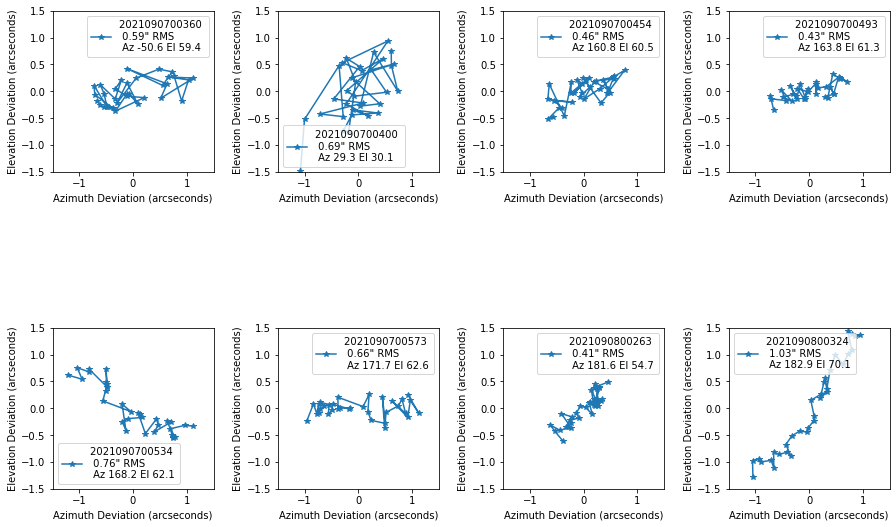

In [14]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
     
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(deviation[:,0], deviation[:,1], label = ('{} \n {}\" RMS \n Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = '*')
    plt.xlim(-1.5,1.5)
    plt.xlabel("Azimuth Deviation (arcseconds)")
    plt.ylim(-1.5,1.5)
    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
plt.savefig('Elevation vs Azimuth Deviation.jpg')

# Azimuth Deviation vs. Azimuth

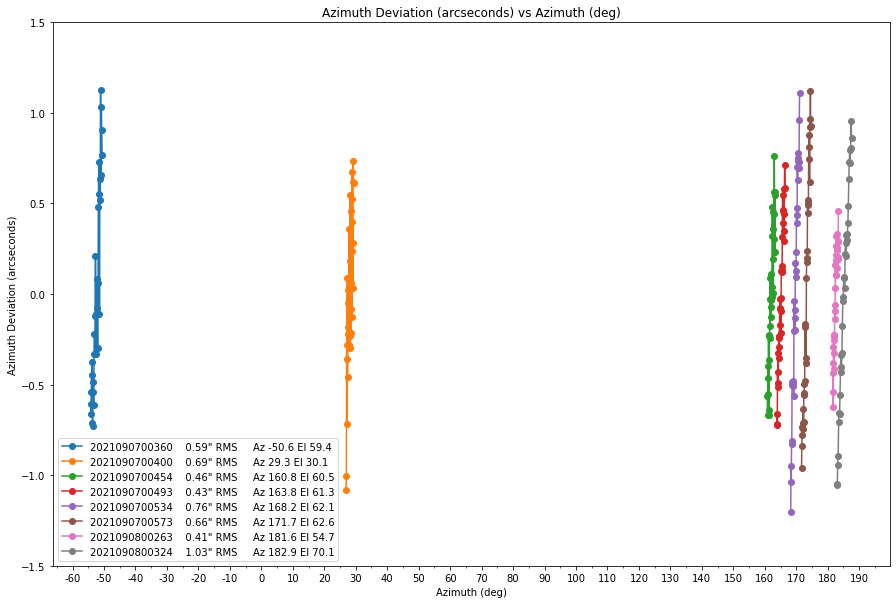

In [10]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,0], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth (deg)")
    ax.set_ylim(-1.5,1.5)
    ax.legend()
    plt.title('Azimuth Deviation (arcseconds) vs Azimuth (deg)')

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.savefig('Azimuth Deviation vs Azimuth.jpg')

# Elevation Deviation vs. Azimuth

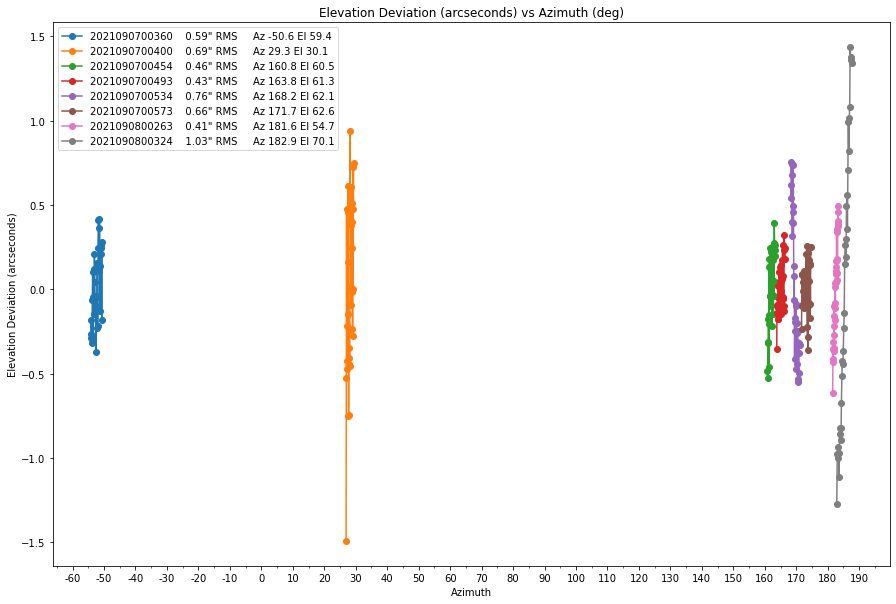

In [84]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale

    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    plt.title('Elevation Deviation (arcseconds) vs Azimuth (deg)')


    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
plt.savefig('Elevation Deviation vs Azimuth.jpg')

# Elevation Deviation vs. Elevation

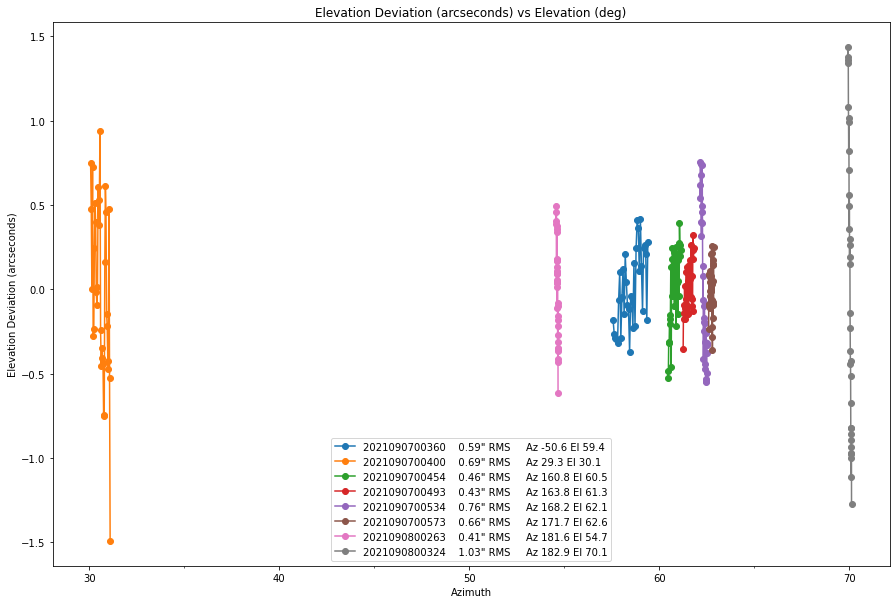

In [85]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Elevation'],deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    plt.title('Elevation Deviation (arcseconds) vs Elevation (deg)')


    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
plt.savefig('Elevation Deviation vs Elevation.jpg')

In [297]:
start_time = Time(posData['2021090700360']['StartTime'][0], format='fits', scale='tai')
print(start_time)
time = start_time.datetime.day
fmt = mdates.DateFormatter("%H:%M")


2021-09-08T06:47:33.263


In [42]:
len(deviation)

33

# Azimuth deviation vs. tracking time

<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-11-4edbcdcb4bb0>:23: UserWarning: FixedF

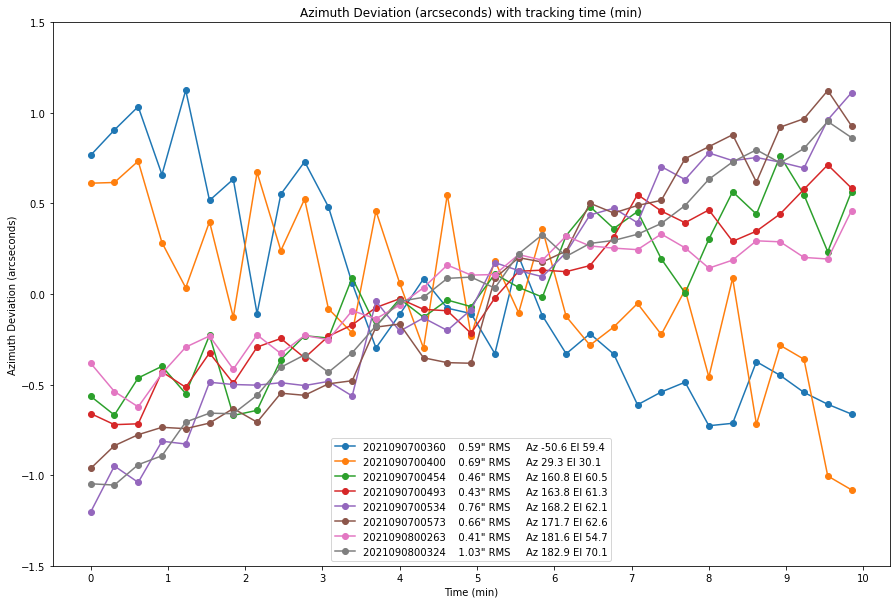

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
    
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    ax.plot(deviation[:,0], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')

    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    ax.set_ylim(-1.5,1.5)

    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Azimuth Deviation (arcseconds) with tracking time (min)')
    a=ax.get_xticks().tolist()
    b = [-10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
    ax.set_xticklabels(b)

 
       # Time axis
    # Major ticks every 5 Hour.
    #loc_maj_ticks = mdates.HourLocator(interval=)
    #ax.xaxis.set_major_locator(loc_maj_ticks)

    # Minor ticks every 1 major
    #loc_major_ticks = mdates.MinuteLocator(interval=1)
    #ax.xaxis.major(loc_major_ticks)

    # Format Major 
    #fmt = mdates.DateFormatter("%H")
    #ax.xaxis.set_major_formatter(fmt)
    #fig.autofmt_xdate()


    #ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=False)
    # Labels and legend
    #plt.tick_params(axis='x', labelrotation=75)
plt.savefig('Azimuth Deviation vs Time.jpg')

# Elevation deviation vs. tracking time

<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedF

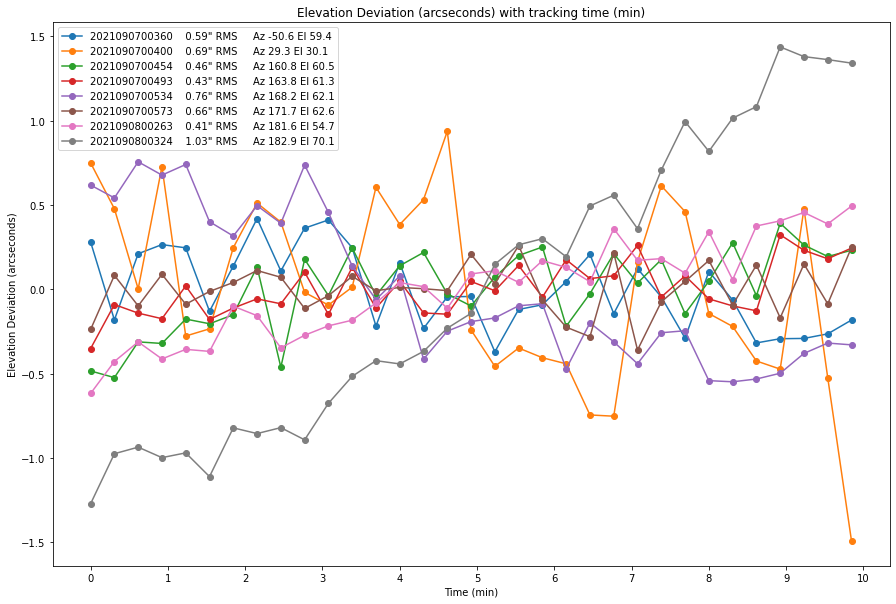

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    
    ax.plot(deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')

    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Elevation Deviation (arcseconds) with tracking time (min)')

    
    a=ax.get_xticks().tolist()
    a = [-99999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999999]
    ax.set_xticklabels(a)

plt.savefig('Elevation Deviation vs Time.jpg')

#RADEC deviation

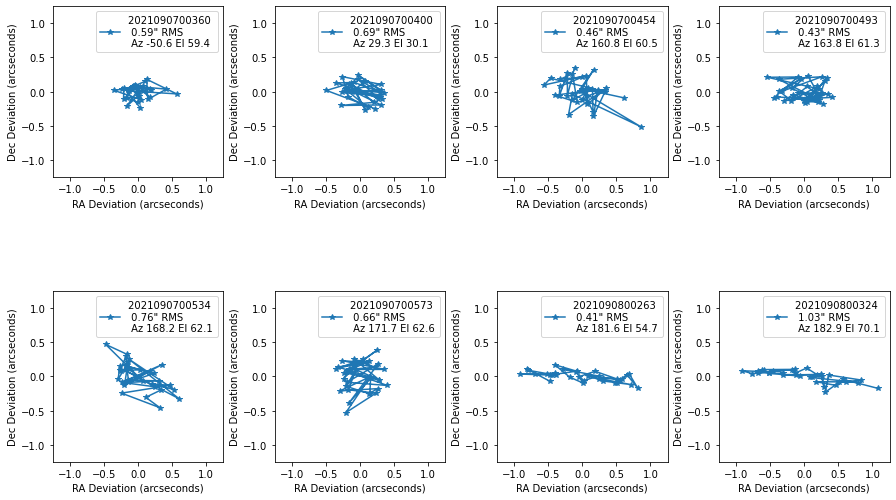

In [15]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
#     if firstExpId == 2021060900268:
#         print(ras)
#         print(decs)
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(ra_deviation, dec_deviation, label = ('{} \n {}\" RMS \n Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))),marker ='*')
    plt.xlim(-1.25,1.25)
    plt.xlabel("RA Deviation (arcseconds)")
    plt.ylim(-1.25,1.25)
    plt.ylabel("Dec Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
plt.savefig('Dec Deviation vs RA Deviation.jpg')

# RA deviation vs. tracking time

<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-16-f88d284c8a77>:23: UserWarning: FixedF

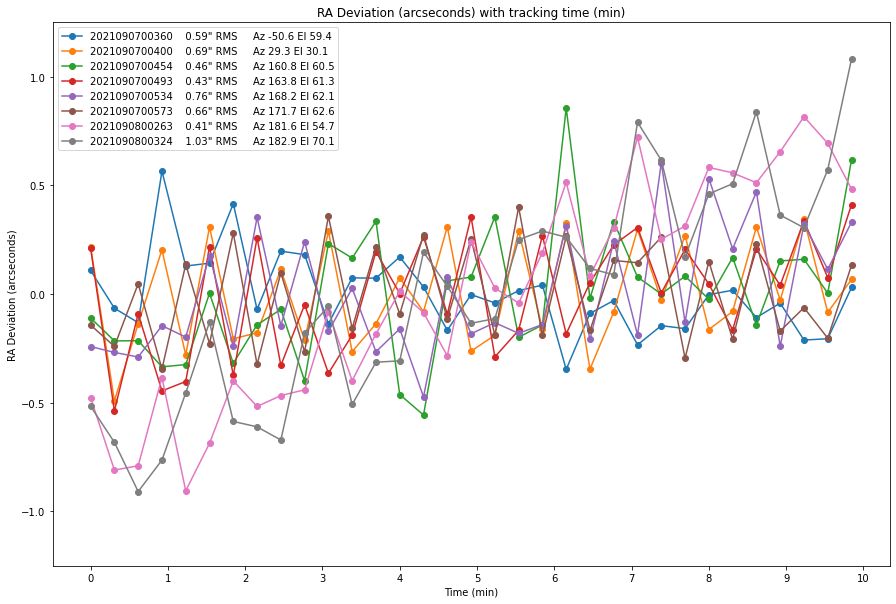

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    
    ax.plot(ra_deviation, label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("RA Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    ax.set_ylim(-1.25,1.25)

    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('RA Deviation (arcseconds) with tracking time (min)')

    a=ax.get_xticks().tolist()
    a = [-99999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999999]
    ax.set_xticklabels(a)

plt.savefig('RA Deviation vs Time.jpg')

# DEC deviation vs. tracking time

<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-17-dc62733518c5>:26: UserWarning: FixedF

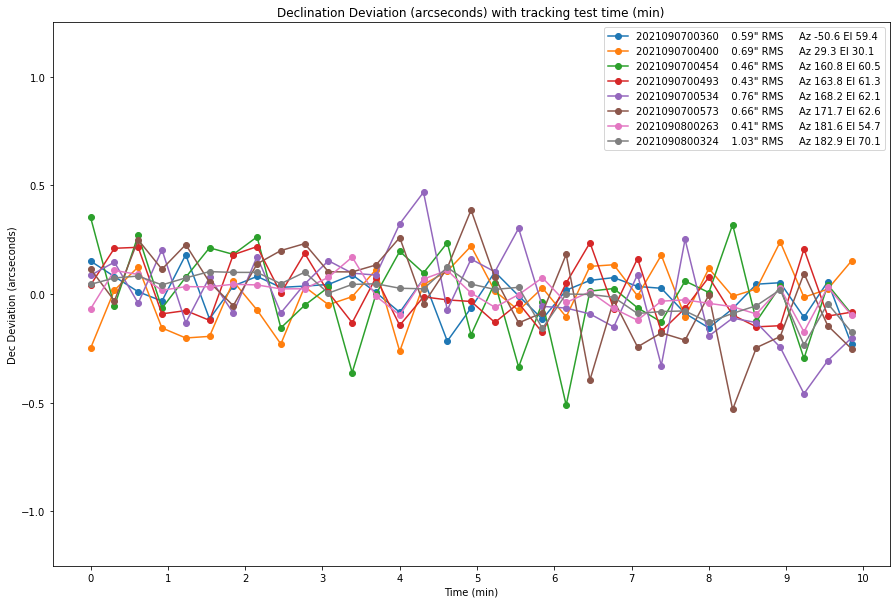

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    ax.plot(dec_deviation, label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Dec Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    ax.set_ylim(-1.25,1.25)

    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Declination Deviation (arcseconds) with tracking test time (min)')

    
    a=ax.get_xticks().tolist()
    a = [-10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
    ax.set_xticklabels(a)

plt.savefig('Dec Deviation vs Time.jpg')

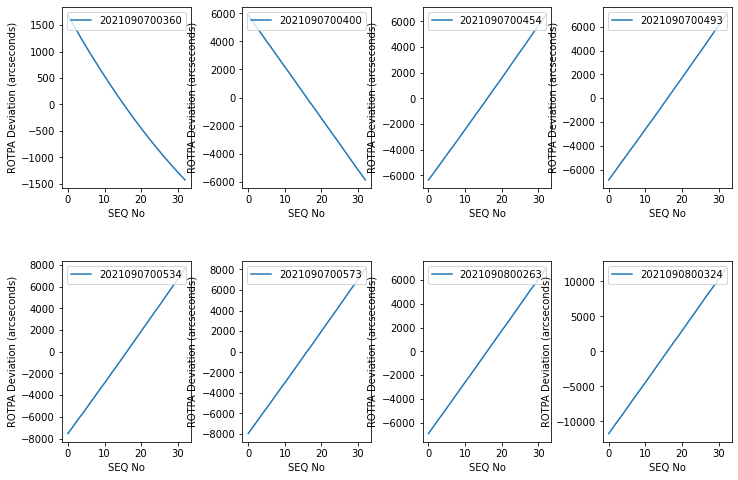

In [54]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    rotpas = np.array(posData[firstExpId]['ROTPA'])
    #print(rotpas)
    meanrotpa = rotpas.mean()
    #print(meanrotpa)
    rotpa_deviation = (rotpas - meanrotpa) * 3600.0
    #print(rotpa_deviation)
    plt.subplot(2,4,plotcounter)
    plt.plot(rotpa_deviation, label = str(firstExpId))
    #plt.xlim(-5,5)
    plt.xlabel("SEQ No")
    #plt.ylim(-5,5)
    plt.ylabel("ROTPA Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
